## Business understanding


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pylab 
import scipy.stats as stats
import seaborn as sns

In [26]:
df = pd.read_csv('upydatasimulado.csv')

df.head()

,Número de matrícula,Dirección (Colonia),Horario de Clases,Posee Vehículo,Asientos Disponibles,Disponibilidad para Compartir Viajes,Necesidad de Transporte,Preferencias Adicionales,Coordenadas
0,UPY2023000,Montes de Amé,7 AM - 2 PM,Sí,3,Sí,Sí,Ninguna,"(21.03435, -89.61553)"
1,UPY2023001,Montes de Amé,7 AM - 2 PM,No,0,No,No,Solo mujeres,"(21.03435, -89.61553)"
2,UPY2023002,Ciudad Caucel,2 PM - 9 PM,Sí,0,Sí,No,Solo mujeres,"(21.01569, -89.70514)"
3,UPY2023003,Centro,2 PM - 9 PM,Sí,2,Sí,Sí,Solo hombres,"(20.96838, -89.62094)"
4,UPY2023004,Chuburná,7 AM - 2 PM,Sí,1,Sí,No,Ninguna,"(21.0125, -89.65118)"


In [27]:
df.columns

Index(['Número de matrícula', 'Dirección (Colonia)', 'Horario de Clases',
       'Posee Vehículo', 'Asientos Disponibles',
       'Disponibilidad para Compartir Viajes', 'Necesidad de Transporte',
       'Preferencias Adicionales', 'Coordenadas'],
      dtype='object')

In [28]:
df.isnull().sum()

Número de matrícula                     0
Dirección (Colonia)                     0
Horario de Clases                       0
Posee Vehículo                          0
Asientos Disponibles                    0
Disponibilidad para Compartir Viajes    0
Necesidad de Transporte                 0
Preferencias Adicionales                0
Coordenadas                             0
dtype: int64

In [29]:
df.shape

(1000, 9)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Número de matrícula                   1000 non-null   object
 1   Dirección (Colonia)                   1000 non-null   object
 2   Horario de Clases                     1000 non-null   object
 3   Posee Vehículo                        1000 non-null   object
 4   Asientos Disponibles                  1000 non-null   int64 
 5   Disponibilidad para Compartir Viajes  1000 non-null   object
 6   Necesidad de Transporte               1000 non-null   object
 7   Preferencias Adicionales              1000 non-null   object
 8   Coordenadas                           1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


Obtaining the complete information of the data, it is possible to understand that we have data of type object and single, so when applying the part of transformation of the data we can make approaches in the types to have cleaner data.

In [31]:
df.dtypes

Número de matrícula                     object
Dirección (Colonia)                     object
Horario de Clases                       object
Posee Vehículo                          object
Asientos Disponibles                     int64
Disponibilidad para Compartir Viajes    object
Necesidad de Transporte                 object
Preferencias Adicionales                object
Coordenadas                             object
dtype: object

## Data preparation

Taking into consideration the data types, two pipelines are created to do the preprocessing according to each data type

In [32]:
#pipeline for numerical columns and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])




categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False)) ])




In [33]:
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [34]:
categorical_transformer

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(sparse=False))])

In [35]:
preprocessor = ColumnTransformer( transformers=[ ('num', numerical_transformer, numerical_columns), ('cat', categorical_transformer, categorical_columns) ])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Asientos Disponibles'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(sparse=False))]),
                                 Index(['Número de matrícula', 'Dirección (Colonia)', 'Horario de Clases',
       'Posee Vehículo', 'Disponibilidad para Compartir Viajes',
       'Necesidad de Transporte', 'Preferencias Adicionales', 'Coordenadas'],
      dtype='object'))])

# Modeling and evaluation

In [36]:
preprocesing_data = preprocessor.fit_transform(df)

preprocesing_data.shape

c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(1000, 1024)

c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

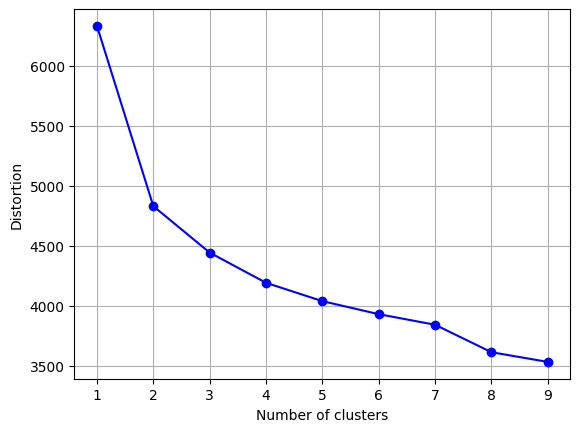

In [37]:
# do a elbow plot to find the best number of clusters

from sklearn.cluster import KMeans
from sklearn import metrics

# k means determine k
range_values = range(1, 10)

distortions = []
for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(preprocesing_data)
    distortions.append(kmeans.inertia_)
    
# Plot the elbow

plt.plot(range_values, distortions, marker='o',  color='b')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()

In [38]:
# plotting clusters in 2D

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(preprocesing_data)

principal_components.shape 

(1000, 2)

In [39]:
# Applying K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(principal_components)


print(clusters)

[2 3 2 2 2 3 2 3 3 1 0 3 3 1 3 3 3 1 0 3 2 3 1 2 3 2 1 3 2 0 2 0 3 3 0 1 3
 2 3 3 1 2 3 2 2 1 1 3 3 0 0 3 3 3 0 3 3 1 0 3 2 3 2 1 2 2 3 1 2 1 2 3 3 3
 0 2 0 1 2 2 1 0 3 2 0 0 1 2 3 1 3 2 2 3 0 1 1 2 3 2 1 0 3 3 1 0 2 2 3 3 0
 1 1 3 3 1 1 2 2 3 3 3 2 2 3 0 2 1 0 0 3 2 2 2 0 2 3 1 2 1 0 3 1 1 3 0 0 1
 0 2 1 3 3 2 2 2 2 3 3 2 3 0 2 0 3 3 2 1 2 1 3 3 2 2 1 2 2 1 2 3 1 0 2 2 3
 3 1 3 1 3 2 3 2 1 2 2 1 3 3 2 2 3 3 3 1 3 3 2 3 3 3 2 3 3 3 3 2 1 0 1 2 0
 3 1 2 3 3 1 0 1 1 2 2 3 2 3 3 3 1 1 0 2 0 3 3 1 1 2 3 0 0 1 3 3 3 1 3 3 1
 2 1 3 1 2 3 1 3 3 1 3 0 3 3 2 2 2 2 0 3 2 2 3 1 3 2 2 0 3 1 2 3 3 3 3 3 1
 3 3 2 3 1 1 3 3 1 1 1 3 2 3 1 2 3 2 0 0 3 0 2 3 0 2 0 3 3 1 2 1 1 3 0 2 2
 2 3 3 1 3 1 3 1 0 3 2 2 2 3 3 0 3 2 1 3 2 1 2 0 3 2 1 3 3 1 3 2 3 1 3 2 3
 3 0 2 3 2 1 2 3 3 2 0 1 3 3 0 1 1 3 3 2 3 2 3 3 2 3 1 1 0 2 0 1 3 2 2 3 2
 1 2 2 1 2 2 2 2 3 2 1 3 3 1 2 2 1 2 1 3 3 2 1 1 3 0 1 1 1 1 2 3 2 2 2 1 3
 0 1 3 3 2 3 2 0 0 3 2 1 3 1 3 1 2 3 1 2 0 1 1 2 3 2 0 3 3 1 2 1 3 2 2 2 3
 3 0 3 3 1 3 2 2 3 2 1 2 

c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
# evaluating the clusters

from sklearn import metrics

score = metrics.silhouette_score(preprocesing_data, clusters)

print(score)



0.08865047147061988


In [41]:

data_with_clusters = df.copy()
data_with_clusters['Cluster'] = clusters
data_with_clusters.head(100)


data_with_clusters.to_csv('data_with_clusters.csv', index=False)

In [42]:
numerical_summary = data_with_clusters.groupby(['Cluster'])[numerical_columns].mean()
categorical_summary = data_with_clusters[categorical_columns].astype(str)
categorical_summary['Cluster'] = data_with_clusters['Cluster']
categorical_summary = categorical_summary.groupby('Cluster').agg(lambda x: x.value_counts().index[0])

cluster_summary = pd.concat([numerical_summary, categorical_summary], axis=1)


cluster_summary

,Asientos Disponibles,Número de matrícula,Dirección (Colonia),Horario de Clases,Posee Vehículo,Disponibilidad para Compartir Viajes,Necesidad de Transporte,Preferencias Adicionales,Coordenadas
Cluster,,,,,,,,,
0,0.000000,UPY2023010,Ciudad Caucel,7 AM - 2 PM,No,No,Sí,Solo hombres,"(21.01569, -89.70514)"
1,3.071730,UPY2023009,Francisco de Montejo,2 PM - 9 PM,Sí,Sí,No,Ninguna,"(21.03017, -89.6453)"
2,1.045455,UPY2023000,Chuburná,7 AM - 2 PM,Sí,Sí,Sí,Ninguna,"(21.0125, -89.65118)"
3,0.000000,UPY2023001,Montes de Amé,2 PM - 9 PM,No,No,No,Solo mujeres,"(21.03435, -89.61553)"


# Visualization

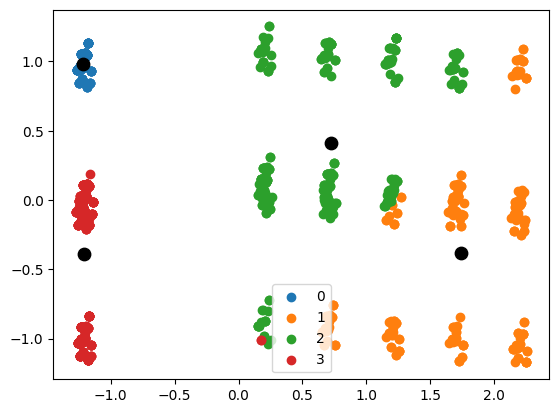

In [43]:
# visualization and interpretation of clusters


# 2D plot of clusters obtained using kmeans
centroids = kmeans.cluster_centers_
u_clusters = np.unique(clusters)

for i in u_clusters:
    
    plt.scatter(principal_components[clusters == i , 0] , principal_components[clusters == i , 1] , label = i)
    
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()

plt.show()




In [44]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from folium import Icon

# Supongamos que df es tu DataFrame y que la columna 'Coordenadas' contiene pares de latitud y longitud en formato de string
df['Coordenadas'] = df['Coordenadas'].apply(lambda x: eval(x))

df[['Latitud', 'Longitud']] = pd.DataFrame(df['Coordenadas'].tolist(), index=df.index)

# Ahora puedes eliminar la columna 'Coordenadas' si lo deseas
df = df.drop(['Coordenadas'], axis=1)

# Crear el mapa centrado en Mérida
m = folium.Map(location=[20.967370, -89.592586], zoom_start=13)

# Crear un objeto de cluster
marker_cluster = MarkerCluster().add_to(m)

# Añadir los puntos al cluster con un popup para cada uno
for index, row in df.iterrows():
    popup_text = '<br>'.join([f'{col}: {row[col]}' for col in df.columns])
    folium.Marker([row['Latitud'], row['Longitud']], popup=popup_text, icon=Icon(color="red")).add_to(marker_cluster)

# Mostrar el mapa
m

#save the map






In [45]:
import numpy as np

# Separando los estudiantes con y sin vehículo
estudiantes_con_vehiculo = data_with_clusters[(data_with_clusters['Posee Vehículo'] == 'Sí') & (data_with_clusters['Asientos Disponibles'] > 0) & (data_with_clusters['Disponibilidad para Compartir Viajes'] == 'Sí')]
estudiantes_sin_vehiculo = data_with_clusters[(data_with_clusters['Posee Vehículo'] == 'No') & (data_with_clusters['Necesidad de Transporte'] == 'Sí')]

# Función para calcular la distancia aproximada entre dos puntos geográficos
def calcular_distancia(coord1, coord2):
    # Convertir las coordenadas de string a tuplas de floats
    coord1 = eval(coord1)
    coord2 = eval(coord2)
    # Calculando la distancia (método simplificado)
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

# Función para encontrar el emparejamiento más cercano
def encontrar_emparejamiento(estudiante_sin_vehiculo, estudiantes_con_vehiculo):
    distancias = estudiantes_con_vehiculo['Coordenadas'].apply(lambda x: calcular_distancia(x, estudiante_sin_vehiculo['Coordenadas']))
    idx_min = distancias.idxmin()
    return estudiantes_con_vehiculo.loc[idx_min]

# Realizando emparejamientos
emparejamientos = []
for index, estudiante_sin_vehiculo in estudiantes_sin_vehiculo.iterrows():
    emparejamiento = encontrar_emparejamiento(estudiante_sin_vehiculo, estudiantes_con_vehiculo)
    # Verificando la compatibilidad de horarios
    exitoso = estudiante_sin_vehiculo['Horario de Clases'] == emparejamiento['Horario de Clases']
    emparejamientos.append({
        "Estudiante Sin Vehículo": estudiante_sin_vehiculo['Número de matrícula'],
        "Estudiante Con Vehículo": emparejamiento['Número de matrícula'],
        "Emparejamiento Exitoso": "Sí" if exitoso else "No"
    })

# Convirtiendo los emparejamientos a un DataFrame para mejor visualización
df_emparejamientos = pd.DataFrame(emparejamientos)
df_emparejamientos.head()  # Mostrando los primeros emparejamientos


,Estudiante Sin Vehículo,Estudiante Con Vehículo,Emparejamiento Exitoso
0,UPY2023010,UPY2023000,Sí
1,UPY2023012,UPY2023020,No
2,UPY2023018,UPY2023003,No
3,UPY2023019,UPY2023020,No
4,UPY2023029,UPY2023003,No


In [46]:
# Combinando los detalles completos de los estudiantes en los emparejamientos

# Para los estudiantes sin vehículo
emparejamientos_detalle = df_emparejamientos.merge(
    data_with_clusters,
    left_on='Estudiante Sin Vehículo',
    right_on='Número de matrícula',
    how='left'
)

# Renombrando las columnas para indicar que pertenecen al estudiante sin vehículo
emparejamientos_detalle.rename(columns={col: col + ' (Sin Vehículo)' for col in data_with_clusters.columns}, inplace=True)

# Para los estudiantes con vehículo
emparejamientos_detalle = emparejamientos_detalle.merge(
    data_with_clusters,
    left_on='Estudiante Con Vehículo',
    right_on='Número de matrícula',
    how='left'
)

# Renombrando las columnas para indicar que pertenecen al estudiante con vehículo
emparejamientos_detalle.rename(columns={col: col + ' (Con Vehículo)' for col in data_with_clusters.columns}, inplace=True)

# Eliminando columnas duplicadas de número de matrícula
emparejamientos_detalle.drop(['Número de matrícula (Sin Vehículo)', 'Número de matrícula (Con Vehículo)'], axis=1, inplace=True)



# Guardando los emparejamientos en un archivo CSV

emparejamientos_detalle.to_csv('emparejamientos.csv', index=False)

# Visualizando los emparejamientos

emparejamientos_detalle.head()  # Mostrando los primeros emparejamientos

,Estudiante Sin Vehículo,Estudiante Con Vehículo,Emparejamiento Exitoso,Dirección (Colonia) (Sin Vehículo),Horario de Clases (Sin Vehículo),Posee Vehículo (Sin Vehículo),Asientos Disponibles (Sin Vehículo),Disponibilidad para Compartir Viajes (Sin Vehículo),Necesidad de Transporte (Sin Vehículo),Preferencias Adicionales (Sin Vehículo),...,Cluster (Sin Vehículo),Dirección (Colonia) (Con Vehículo),Horario de Clases (Con Vehículo),Posee Vehículo (Con Vehículo),Asientos Disponibles (Con Vehículo),Disponibilidad para Compartir Viajes (Con Vehículo),Necesidad de Transporte (Con Vehículo),Preferencias Adicionales (Con Vehículo),Coordenadas (Con Vehículo),Cluster (Con Vehículo)
0,UPY2023010,UPY2023000,Sí,Montes de Amé,7 AM - 2 PM,No,0,No,Sí,Solo hombres,...,0,Montes de Amé,7 AM - 2 PM,Sí,3,Sí,Sí,Ninguna,"(21.03435, -89.61553)",2
1,UPY2023012,UPY2023020,No,Francisco de Montejo,2 PM - 9 PM,No,0,No,Sí,Ninguna,...,3,Francisco de Montejo,7 AM - 2 PM,Sí,3,Sí,Sí,Ninguna,"(21.03017, -89.6453)",2
2,UPY2023018,UPY2023003,No,Centro,7 AM - 2 PM,No,0,No,Sí,Solo hombres,...,0,Centro,2 PM - 9 PM,Sí,2,Sí,Sí,Solo hombres,"(20.96838, -89.62094)",2
3,UPY2023019,UPY2023020,No,Francisco de Montejo,2 PM - 9 PM,No,0,No,Sí,Solo hombres,...,3,Francisco de Montejo,7 AM - 2 PM,Sí,3,Sí,Sí,Ninguna,"(21.03017, -89.6453)",2
4,UPY2023029,UPY2023003,No,Centro,7 AM - 2 PM,No,0,No,Sí,Solo mujeres,...,0,Centro,2 PM - 9 PM,Sí,2,Sí,Sí,Solo hombres,"(20.96838, -89.62094)",2


# The implementation with reinforcement learning, future plans

 This is just an example of how to use  reinforcement learning to solve a problem